# Plot basic classification event selecttion cuts

last edit Mar-20, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
figures_path = "/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/"
import ROOT 

Welcome to JupyROOT 6.26/06


In [210]:
pd.options.display.precision = 1

# Auxiliary

In [90]:
def compute_cut_impact_on_statistics(df_pips, df_pims, Npips_noCuts=1,Npims_noCuts=1):
    # Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events,Npips_noCuts=1,Npims_noCuts=1)
    Npips,Npims = len(df_pips),len(df_pims)
    
    fpips  = 100.*Npips/Npips_noCuts
    dfpips = fpips * np.sqrt(1./np.max([Npips,1])+1./Npips_noCuts)
    fpims  = 100.*Npims/Npims_noCuts
    dfpims = fpims * np.sqrt(1./np.max([Npims,1])+1./Npims_noCuts)

    return Npips,Npims,fpips,dfpips,fpims,dfpims 

# (1) Load data and cut values

## (1.1) Load cut variables

In [71]:
cuts = pd.read_csv( '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/cuts/BANDcutValues.csv' );

## (1.2) Load data

In [5]:
pipsfilename = '/Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piplus.root'
pimsfilename = '/Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piminus.root'

In [404]:
NeventsMax = 100#0 0#00

In [408]:
Nevntries = NeventsMax
e_Sector, pi_Sector = dict(),dict()
Ve_z,     Vpi_z     = dict(),dict()
W,Q2,y              = dict(),dict(),dict()
e_P,pi_P,e_Theta    = dict(),dict(),dict()
pi_Theta,e_Phi      = dict(),dict()
pi_Phi              = dict()
e_E_PCAL, e_E_ECIN  = dict(),dict()
e_E_ECOUT, e_PCAL_W = dict(),dict()
e_PCAL_V            = dict()
pi_chi2PID          = dict()
Zpi                 = dict()
Npions              = dict()
Npips, Npims        = dict(), dict()

Ve = ROOT.TVector3()
Vpi = ROOT.TVector3()

e = ROOT.TLorentzVector()
pi = ROOT.TLorentzVector()

Nevts = dict()
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    print(pi_ch)
    filename = '~/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_%s.root'%pi_ch
    f = ROOT.TFile(filename)
    tree = f.Get("tree")
    
    W[pi_ch],Q2[pi_ch],y[pi_ch]      = [],[],[]
    e_P[pi_ch],     pi_P[pi_ch]      = [],[]
    e_Theta[pi_ch], pi_Theta[pi_ch]  = [],[]  
    e_Phi[pi_ch],   pi_Phi[pi_ch]    = [],[]
    e_Sector[pi_ch],pi_Sector[pi_ch] = [],[]    
    Ve_z[pi_ch],    Vpi_z[pi_ch]     = [],[]
    e_E_PCAL[pi_ch], e_E_ECIN[pi_ch] = [],[]
    e_E_ECOUT[pi_ch], e_PCAL_W[pi_ch]= [],[]
    e_PCAL_V[pi_ch]                  = []  
    Zpi[pi_ch]                       = []
    pi_chi2PID[pi_ch]                = []
    Npips[pi_ch], Npims[pi_ch]       = [], []
    Nevts[pi_ch]                     = 0
    
    for entryNum in range(0,np.min([Nevntries,tree.GetEntries()])):
        tree.GetEntry(entryNum)
        Npi = getattr(tree,"Npi")
        Npips[pi_ch] = getattr(tree,"Npips")
        Npims[pi_ch] = getattr(tree,"Npims")
        
        if pi_ch=='piplus'  and Npips[pi_ch]==0: continue
        if pi_ch=='piminus' and Npims[pi_ch]==0: continue
        
        e_E_PCAL[pi_ch] .append( getattr(tree,"e_E_PCAL") ) 
        e_E_ECIN[pi_ch] .append( getattr(tree,"e_E_ECIN") )
        e_E_ECOUT[pi_ch].append( getattr(tree,"e_E_ECOUT"))
        e_PCAL_W[pi_ch] .append( getattr(tree,"e_PCAL_W") )
        e_PCAL_V[pi_ch] .append( getattr(tree,"e_PCAL_V") )
        e_Sector[pi_ch] .append( getattr(tree,"e_DC_sector") )

        
        e  = getattr(tree,"e") 
        Ve =  getattr(tree,"Ve") 
        Ve_z[pi_ch]    .append(Ve.Z()) 
        e_P[pi_ch]     .append(e.P()) 
        e_Theta[pi_ch] .append(e.Theta()) 
        e_Phi[pi_ch]   .append(e.Phi()) 
        y[pi_ch]       .append(getattr(tree,"y"))
        W[pi_ch]       .append(getattr(tree,"W"))
        Q2[pi_ch]      .append(getattr(tree,"Q2"))

        pi             = getattr(tree,"pi") 
        Vpi            = getattr(tree,"Vpi") 
        pi_DC_sector   = getattr(tree,"pi_DC_sector")
        pi_chi2PID_arr = getattr(tree,"pi_chi2PID")

        Zpi[pi_ch]      .append( getattr(tree,"Z") )
        pi_P[pi_ch]     .append(pi[0].P()) 
        pi_Theta[pi_ch] .append(pi[0].Theta()) 
        pi_Phi[pi_ch]   .append(pi[0].Phi()) 
        pi_Sector[pi_ch].append(pi_DC_sector[0]) 
        Vpi_z[pi_ch]    .append(Vpi[0].Z()) 
        pi_chi2PID[pi_ch].append(pi_chi2PID_arr[0] )

        print('event',entryNum,', Npips:',getattr(tree,"Npips"),', pi_chi2PID:',pi_chi2PID_arr[0])

        Nevts[pi_ch] = Nevts[pi_ch]+1 
    f.Close()
    print("Collected %d d(e,e'"%Nevts[pi_ch]+pi_ch+") events.")
print('Done.')

piplus
event 2 , Npips: 4 , pi_chi2PID: -376.8092346191406
event 3 , Npips: 1 , pi_chi2PID: -9999.0
event 6 , Npips: 1 , pi_chi2PID: 0.5337691903114319
event 9 , Npips: 1 , pi_chi2PID: -9999.0
event 11 , Npips: 1 , pi_chi2PID: -1.1667450666427612
event 12 , Npips: 1 , pi_chi2PID: 1.9597605466842651
event 14 , Npips: 1 , pi_chi2PID: -0.13800793886184692
event 16 , Npips: 2 , pi_chi2PID: -0.08315129578113556
event 19 , Npips: 2 , pi_chi2PID: -9999.0
event 23 , Npips: 1 , pi_chi2PID: 0.1248314157128334
event 24 , Npips: 1 , pi_chi2PID: -1.214046835899353
event 25 , Npips: 1 , pi_chi2PID: -9999.0
event 26 , Npips: 1 , pi_chi2PID: -1.254953145980835
event 27 , Npips: 1 , pi_chi2PID: -0.8655454516410828
event 39 , Npips: 1 , pi_chi2PID: -1.7989119291305542
event 40 , Npips: 3 , pi_chi2PID: -9999.0
event 42 , Npips: 4 , pi_chi2PID: -1.2281078100204468
event 44 , Npips: 1 , pi_chi2PID: -9999.0
event 46 , Npips: 1 , pi_chi2PID: -1.333892822265625
event 48 , Npips: 1 , pi_chi2PID: 0.527620732784

Warning in <TFile::Init>: file /Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piplus.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piplus.root, recovered key TTree:tree at address 3129228186
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piminus.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/erezcohen/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_piminus.root, recovered key TTree:tree at address 2577424892
Warning in <TFile::Init>: successfully recovered 1 keys


In [374]:
Events = dict()
for pi_ch in pi_charge_names:
    Events[pi_ch] = pd.DataFrame({'e_E_PCAL' :e_E_PCAL[pi_ch],
                                  'e_E_ECIN' :e_E_ECIN[pi_ch],                                
                                  'e_E_ECOUT':e_E_ECOUT[pi_ch],
                                  'e_PCAL_W' :e_PCAL_W[pi_ch],
                                  'e_PCAL_V' :e_PCAL_V[pi_ch],
                                  
                                  'Ve_z'     :Ve_z[pi_ch],
                                  'e_P'      :e_P[pi_ch],
                                  'e_Theta'  :e_Theta[pi_ch],
                                  'e_Phi'    :e_Phi[pi_ch],
                                  'e_Sector' :e_Sector[pi_ch],
                                  'y'        :y[pi_ch],
                                  'W'        :W[pi_ch],
                                  'Q2'       :Q2[pi_ch],

                                  'Vpi_z'    :Vpi_z[pi_ch],
                                  'pi_P'     :pi_P[pi_ch],
                                  'pi_Theta' :pi_Theta[pi_ch],
                                  'pi_Phi'   :pi_Phi[pi_ch],
                                  'pi_Sector':pi_Sector[pi_ch],   
                                  'Zpi'      :Zpi[pi_ch],
                                  'pi_chi2PID':pi_chi2PID[pi_ch],
                                  'Npips'    :Npips[pi_ch],
                                  'Npims'    :Npims[pi_ch],
                                 })
print('Created dataFrames')


Created dataFrames


In [384]:
# Events[pi_ch].pi_chi2PID
# Events[pi_ch].Npips[0:40]

## (1.3) Create a data-frame to count the statistics per cut

In [385]:
cols=['Cut','$N_{\pi^+}$','$N_{\pi^-}$',
                              '$f_{\pi^+}$ [%]','$\Delta f_{\pi^+}$ [%]',
                              '$f_{\pi^-}$ [%]','$\Delta f_{\pi^-}$ [%]']
Nevents = pd.DataFrame(columns=cols)

In [386]:
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus'],Events['piminus'], Npips_noCuts=len(Events['piplus']),Npims_noCuts=len(Events['piminus']))
Npips_noCuts,Npims_noCuts = Npips, Npims
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:'No cut',cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},index=[0])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3


# (2) Apply event-selection cuts

The order of cuts:
1. PCAL fiducial cuts $V_{PCAL} > 19 $ cm and $W_{PCAL} > 19 $ cm 
        
2. PCAL minimum energy deposition cut $PCAL_{dep} > 70$ MeV

3. Calorimetry sampling fraction cut  $\Delta E_{dep}(PCAL + ECIN + ECOUT) / p_e > 0.17$ 

4. $ \frac{E_{ECIN}}{p} > 0.2 - \frac{E_{PCAL}}{p}$ 

5. Vertex $z$ position $-13.0 \mathrm{cm} < v_z < + 12.0 \mathrm{cm}$ 

6. Difference between vertex $z$-position of the electron and the pion $|v_z(e) - v_z(\pi)| < 20.0$ cm 

7. Cut on $\chi^2_{PID}$ from the Event Builder for the pions 

8. DC fiducial cuts 

9. Enhance DIS contribution $W > 2.5$ GeV/c$^2$  

10. Enhance DIS contribution $Q > 2$ (GeV/c)$^2$

11. Suppress QE contribution $y < 0.75$  

12. Reduce the contamination from exclusive processes $M_x > 1.7$ GeV/c$^2$

13. Electron momentum $3 < p_e < 10$ GeV/c  

14. Suppress Kaon contamination in the pion sample $1.25 < p_\pi < 5$ GeV/c  

15. Focus on high acceptance the HTCC $5^\circ < \theta_e < 35^\circ$ and $5^\circ < \theta_\pi < 35^\circ$  

16. Leading outgoing pions $z_\pi>0.3$ 

17. $\pi^+$ and $\pi^-$ acceptance matching cut 


### 2.1. PCAL V and W

In [387]:
previous_cut_label = ''
Events_previous_cuts = dict()

Vmin = float(cuts[cuts.parameter=='e_PCAL_V_min'].value)
Wmin = float(cuts[cuts.parameter=='e_PCAL_V_min'].value)

cut_idx = 1
cut_label = 'PCAL %d<V & %d<W'%(Vmin,Wmin)
for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch]
    Events[pi_ch+' '+cut_label] = Events[pi_ch][ (Vmin < Events[pi_ch].e_PCAL_V) 
                                                &(Wmin < Events[pi_ch].e_PCAL_W) ]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/piminus_e_PCAL_W_vs_e_PCAL_V.pdf


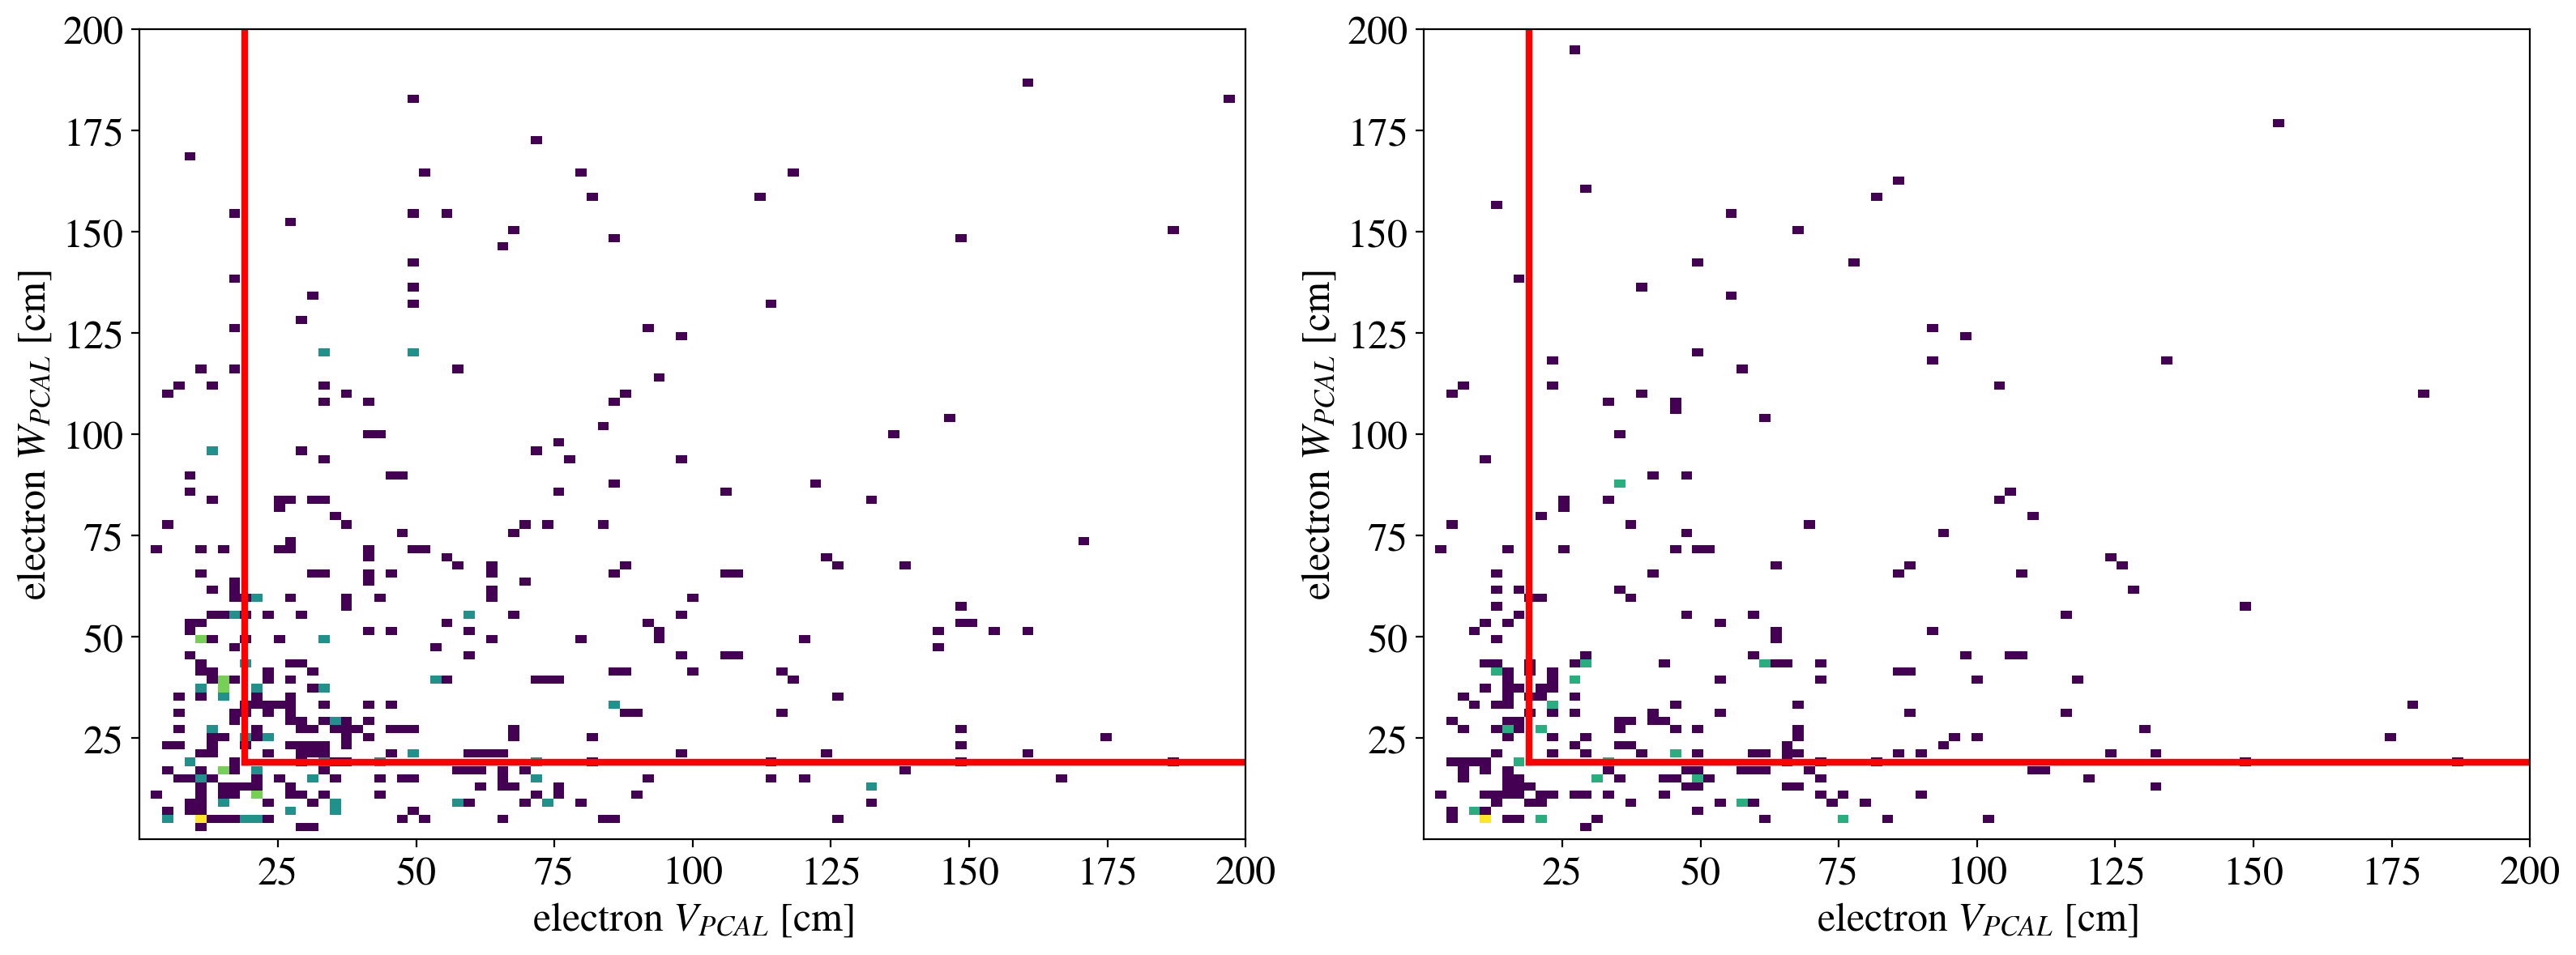

In [388]:
Vminlim,Vmaxlim,Wminlim,Wmaxlim,Nbins = 0.01,200,0.01,200,100
fig = plt.figure(figsize=(16,6),tight_layout=True)

for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    
    x = Events_previous_cuts[pi_ch].e_PCAL_V
    y = Events_previous_cuts[pi_ch].e_PCAL_W
    ax = fig.add_subplot(1,2,pi_idx)

    plt.hist2d( x, y, bins=(np.linspace(Vminlim,Vmaxlim,Nbins),np.linspace(Wminlim,Wmaxlim,Nbins)) ,norm=LogNorm() )
    set_axes(ax,'electron $V_{PCAL}$ [cm]','electron $W_{PCAL}$ [cm]',fontsize=18, xlim=(Vminlim,Vmaxlim),ylim=(Wminlim,Wmaxlim),do_add_grid=False)
    
    plt.plot([Vmin,   Vmin],[Wmin, Wmaxlim],'-r',linewidth=3);
    plt.plot([Vmin,Vmaxlim],[Wmin, Wmin],'-r',linewidth=3);

save_figure(filename = figures_path + pi_ch + '_e_PCAL_W_vs_e_PCAL_V' + '.pdf')

### 2.2 PCAL minimum energy deposition cut $PCAL_{dep} > 70$ MeV

In [389]:
previous_cut_label = 'PCAL %d<V & %d<W'%(Vmin,Wmin)
Events_previous_cuts = dict()

cut_idx = 2
e_E_PCALmin = float(cuts[cuts.parameter=='e_E_PCAL_min'].value)
cut_label = '%.0f MeV < PCAL Edep'%(e_E_PCALmin*1e3)

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    Events[pi_ch+' '+cut_label] = Events_previous_cuts[pi_ch][ (e_E_PCALmin < Events_previous_cuts[pi_ch].e_E_PCAL)]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/e_E_PCAL.pdf


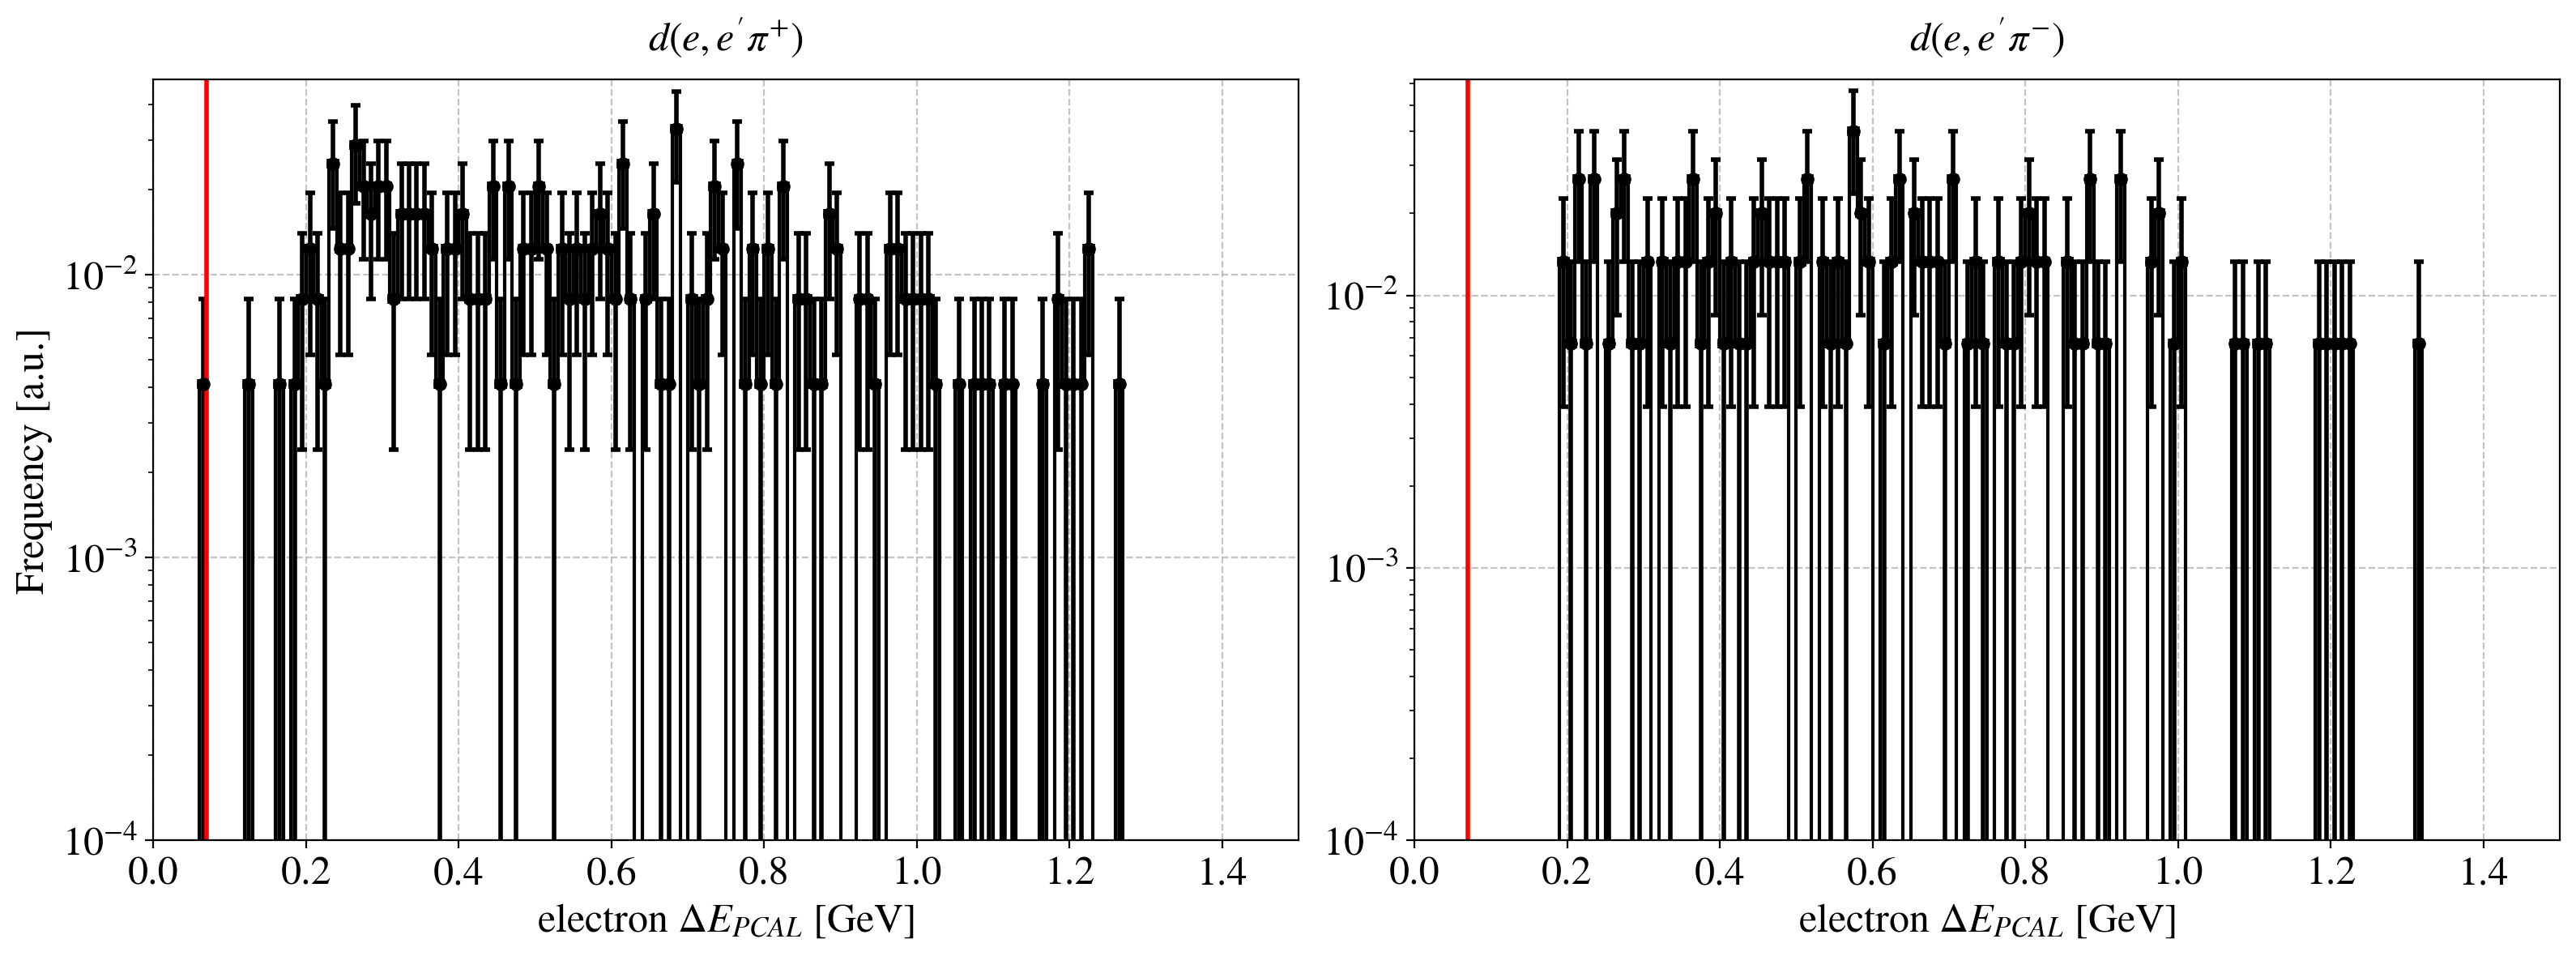

In [390]:
xmin,xmax,Nbins = 0.0,1.5,75*2+1
fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = Events_previous_cuts[pi_ch].e_E_PCAL
    ax = fig.add_subplot(1,2,pi_idx)
    x,h,x_err,h_err = plot_step_hist(x, bins=np.linspace(xmin,xmax,Nbins),density=True,color='k')
    ymax = 1.1*np.max(h+h_err)
    set_axes(ax,'electron $\Delta E_{PCAL}$ [GeV]',
             'Frequency [a.u.]' if pi_idx==1 else '',
             title="$d(e,e'"+pi_label+")$",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,ymax),do_add_grid=True)
    ax.set_yscale('log')
    plt.plot([e_E_PCALmin,e_E_PCALmin],[1e-7,ymax],'-r',linewidth=2);

save_figure(filename = figures_path + 'e_E_PCAL' + '.pdf')

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/e_ECAL_vs_e_PCAL.pdf


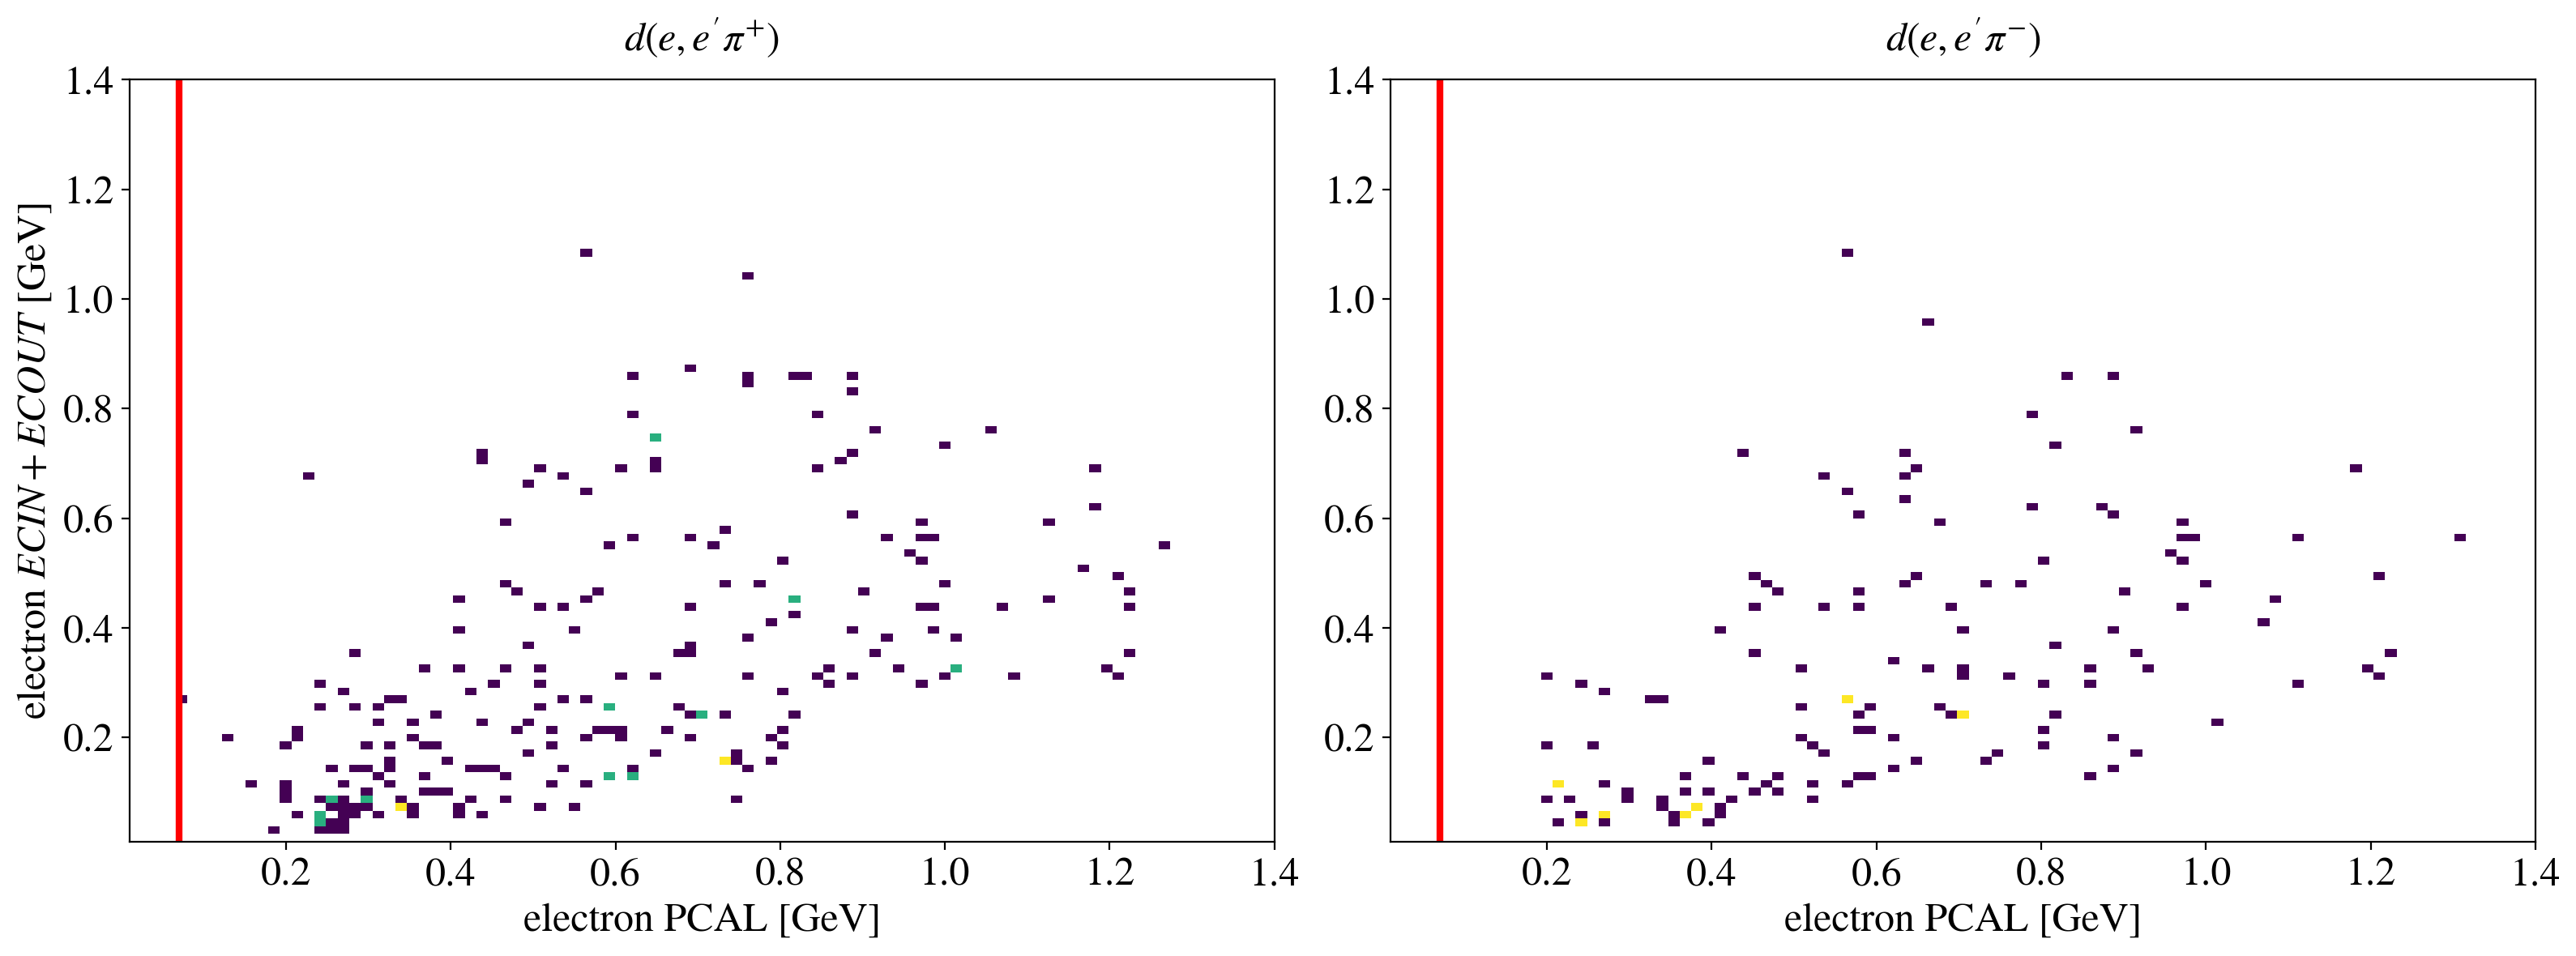

In [391]:
xmin,xmax,ymin,ymax,Nbins = 0.01,1.4,0.01,1.4,100
fig = plt.figure(figsize=(16,6),tight_layout=True)

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = Events_previous_cuts[pi_ch].e_E_PCAL
    y = Events_previous_cuts[pi_ch].e_E_ECIN + Events_previous_cuts[pi_ch].e_E_ECOUT

    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist2d( x, y, bins=(np.linspace(xmin,xmax,Nbins),np.linspace(ymin,ymax,Nbins)), 
               norm=LogNorm() );
    set_axes(ax,'electron PCAL [GeV]','electron $ECIN + ECOUT$ [GeV]' if pi_idx==1 else '',title="$d(e,e'"+pi_label+")$",fontsize=18)
    plt.plot([e_E_PCALmin,e_E_PCALmin],ax.get_ylim(),'-r',linewidth=3);
    
save_figure(filename = figures_path + 'e_ECAL_vs_e_PCAL' + '.pdf')

### 2.3 Calorimetry sampling fraction cut  $\Delta E_{dep}(PCAL + ECIN + ECOUT) / p_e > 0.17$ 

In [392]:
previous_cut_label = '%.0f MeV < PCAL Edep'%(e_E_PCALmin*1e3)
Events_previous_cuts = dict()

cut_idx = 3
SamplingFraction_min = float(cuts[cuts.parameter=='SamplingFraction_min'].value)
cut_label = '$(PCAL + ECIN + ECOUT)/p_e > %.2f$'%SamplingFraction_min

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    Events[pi_ch+' '+cut_label] = Events_previous_cuts[pi_ch][ SamplingFraction_min < (Events_previous_cuts[pi_ch].e_E_PCAL 
                                                                                       + Events_previous_cuts[pi_ch].e_E_ECIN
                                                                                       + Events_previous_cuts[pi_ch].e_E_ECOUT)/(Events_previous_cuts[pi_ch].e_P)]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/SamplingFraction_vs_e_P.pdf


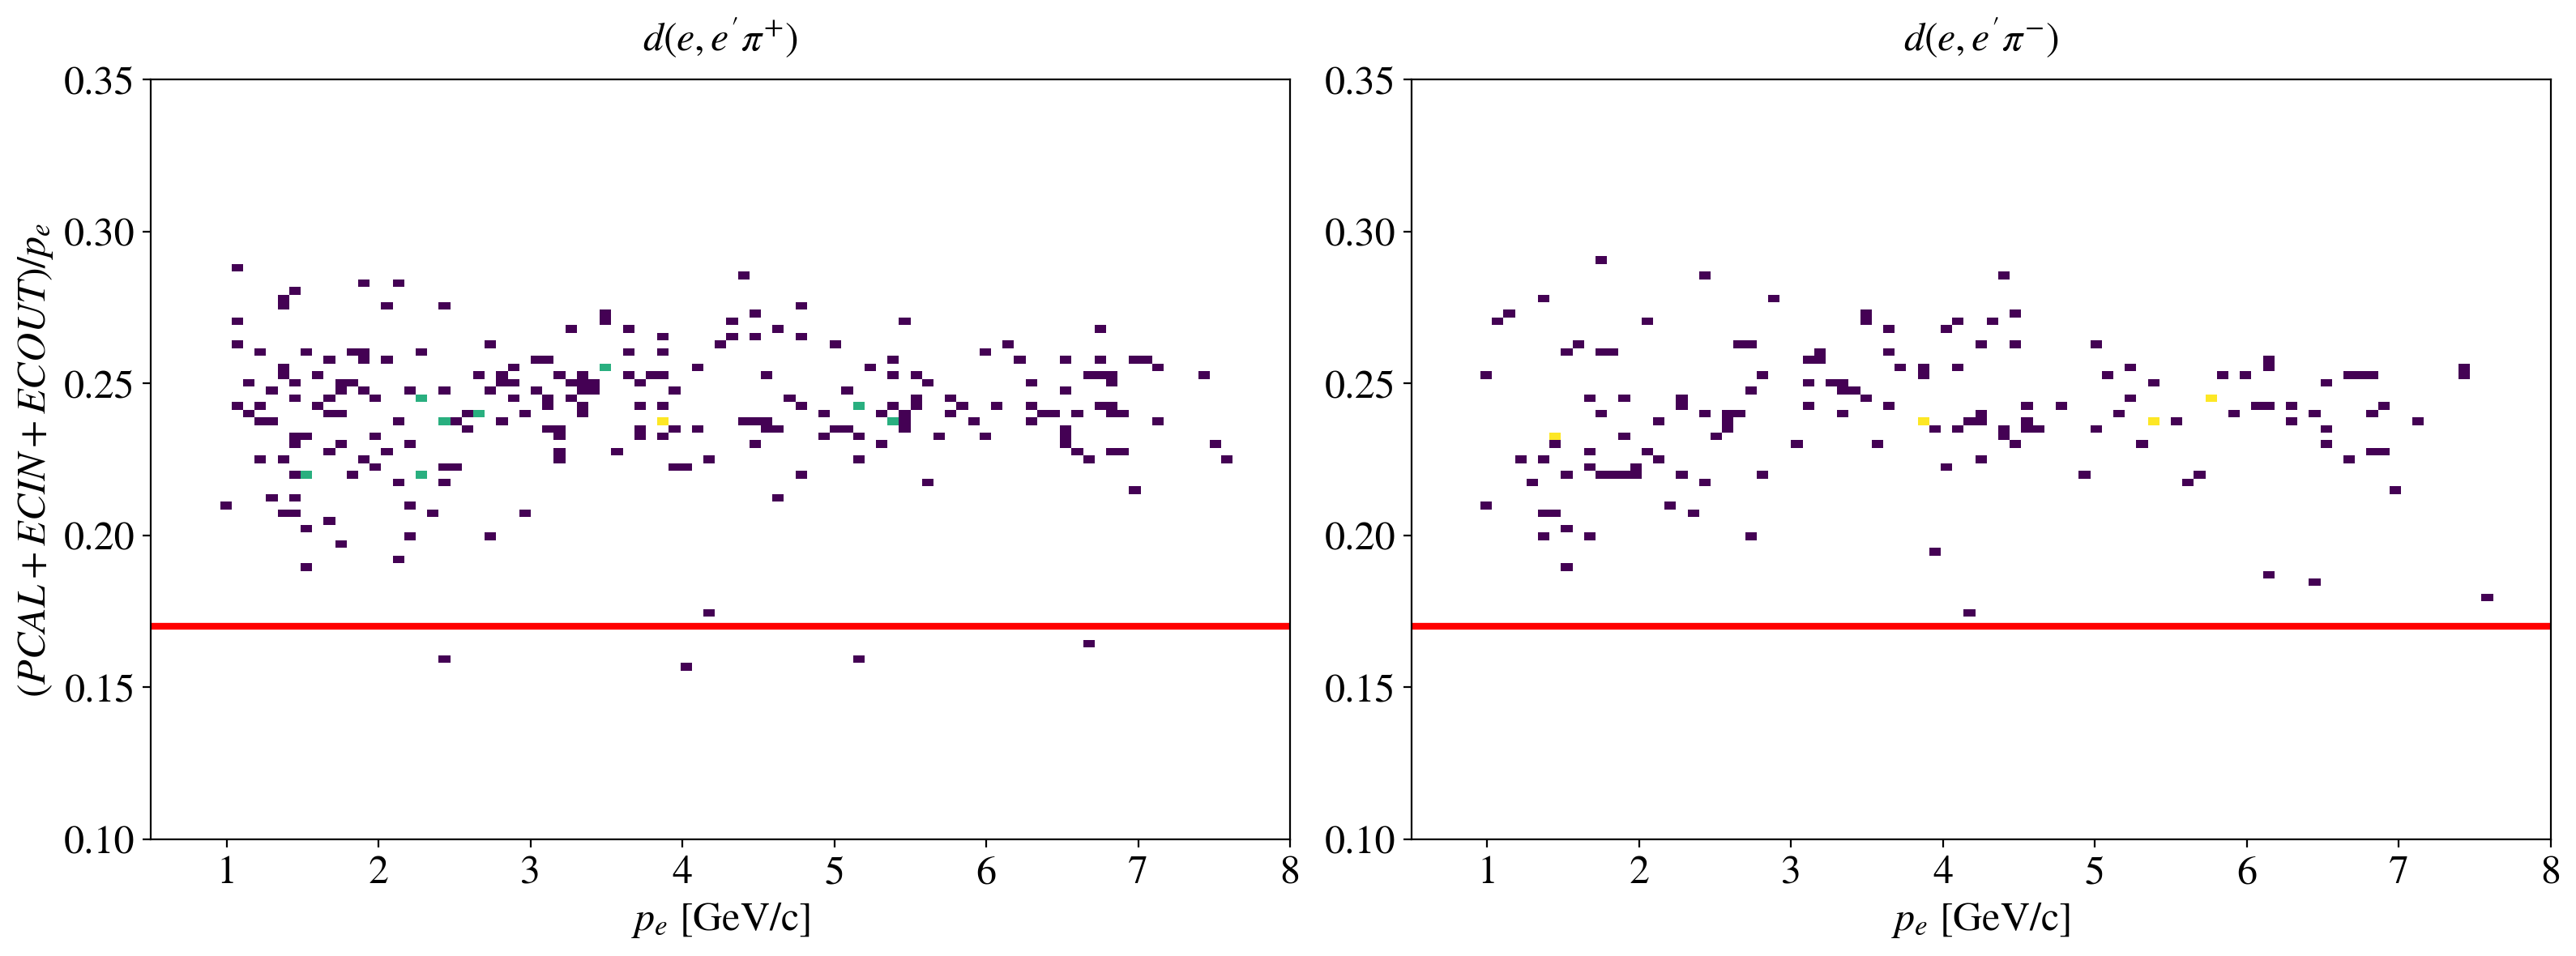

In [393]:
xmin,xmax,ymin,ymax,Nbins = .5,8,0.1,0.35,100

fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    x = Events_previous_cuts[pi_ch].e_P
    y = (Events_previous_cuts[pi_ch].e_E_PCAL + Events_previous_cuts[pi_ch].e_E_ECIN + Events_previous_cuts[pi_ch].e_E_ECOUT)/Events_previous_cuts[pi_ch].e_P

    plt.hist2d( x, y, bins=(np.linspace(xmin,xmax,Nbins),np.linspace(ymin,ymax,Nbins)), 
           norm=LogNorm() );
    plt.plot([0,10],[SamplingFraction_min,SamplingFraction_min],'-r',linewidth=3);
    set_axes(ax,'$p_e$ [GeV/c]','$(PCAL + ECIN + ECOUT)/p_e$' if pi_idx==1 else '',title="$d(e,e'"+pi_label+")$",fontsize=18)
# cbar=plt.colorbar()
# cbar.ax.tick_params(axis="both", labelsize=21)
save_figure(filename = figures_path + 'SamplingFraction_vs_e_P' + '.pdf')

### 2.4 $ \frac{E_{ECIN}}{p} > 0.2 - \frac{E_{PCAL}}{p}$ 

In [394]:
previous_cut_label = '$(PCAL + ECIN + ECOUT)/p_e > %.2f$'%SamplingFraction_min
Events_previous_cuts = dict()

cut_idx = 4
cut_label = '$\\frac{ECIN}{p} > 0.2 - \\frac{PCAL}{p}$' 

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    Events[pi_ch+' '+cut_label] = Events_previous_cuts[pi_ch][ Events_previous_cuts[pi_ch].e_E_ECIN/Events_previous_cuts[pi_ch].e_P > 
                                                              (0.2 - Events_previous_cuts[pi_ch].e_E_PCAL/Events_previous_cuts[pi_ch].e_P)]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2
4,$\frac{ECIN}{p} > 0.2 - \frac{PCAL}{p}$,231,142,51.8,4.2,49.1,5.0


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/e_ECIN_vs_e_PCAL.pdf


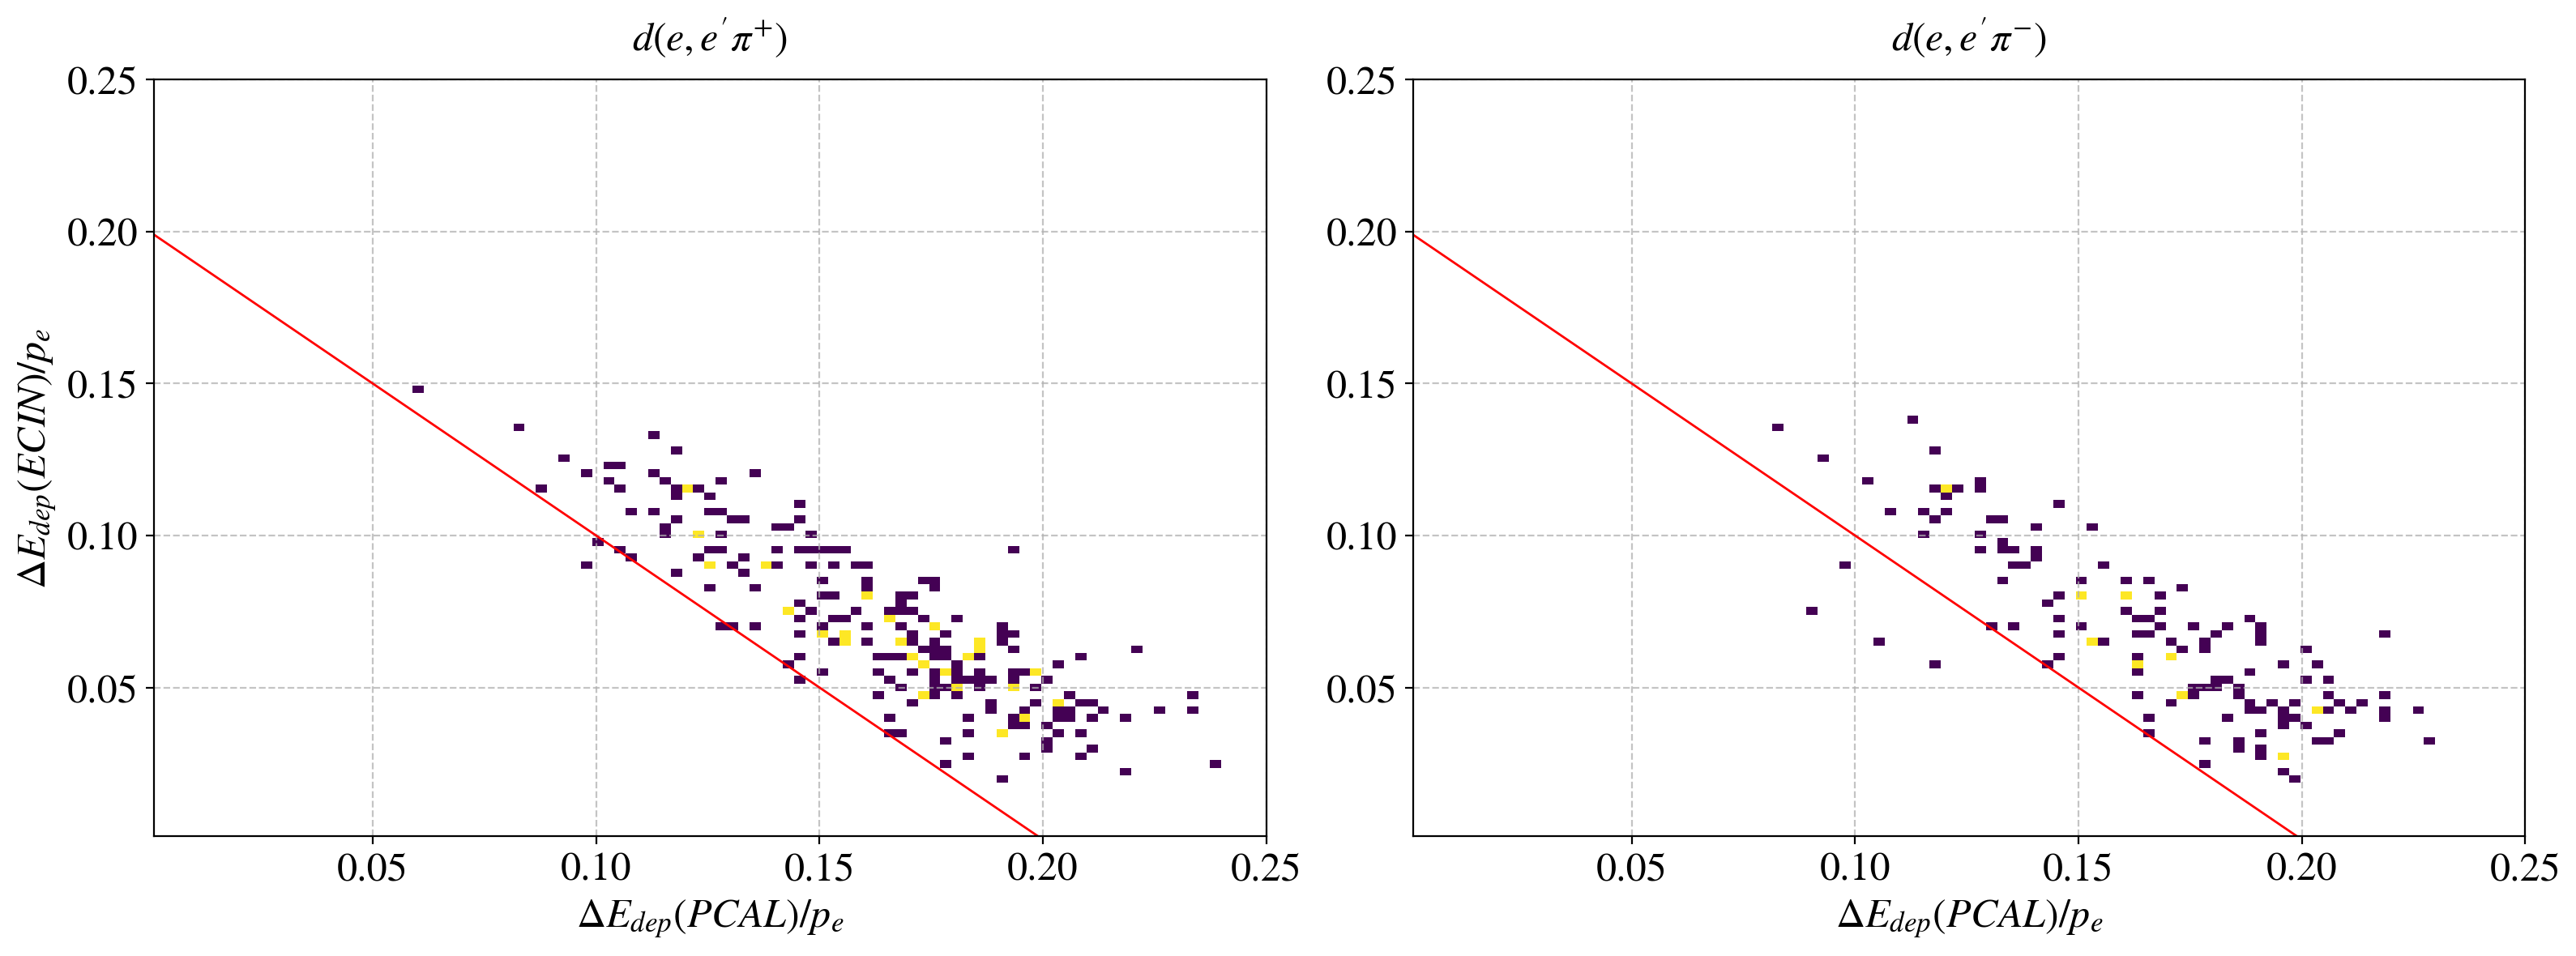

In [395]:
xmin,xmax,ymin,ymax,Nbins = 0.001,0.25,0.001,0.25,100
fig = plt.figure(figsize=(16,6),tight_layout=True)

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    x = Events_previous_cuts[pi_ch].e_E_PCAL/Events_previous_cuts[pi_ch].e_P
    y = Events_previous_cuts[pi_ch].e_E_ECIN/Events_previous_cuts[pi_ch].e_P
    plt.hist2d( x, y, bins=(np.linspace(xmin,xmax,Nbins),np.linspace(ymin,ymax,Nbins)),  norm=LogNorm() );
    plt.plot([0,0.2],[0.2,0],'-r',linewidth=1);
    set_axes(ax,'$\Delta E_{dep}(PCAL) / p_e$','$\Delta E_{dep}(ECIN) / p_e$' if pi_idx==1 else '',title="$d(e,e'"+pi_label+")$",fontsize=18, do_add_grid=True)
# cbar=plt.colorbar()
# cbar.ax.tick_params(axis="both", labelsize=21)

save_figure(filename = figures_path + 'e_ECIN_vs_e_PCAL' + '.pdf')

### 2.5 Vertex $z$ position $-13.0 \mathrm{cm} < v_z < + 12.0 \mathrm{cm}$ 

In [396]:
previous_cut_label = '$\\frac{ECIN}{p} > 0.2 - \\frac{PCAL}{p}$' 
Events_previous_cuts = dict()

cut_idx = 5
Ve_z_min = -13.0
Ve_z_max = 12.0
cut_label = '$-13.0< v^e_z < +12.0$' 

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    Events[pi_ch+' '+cut_label] = Events_previous_cuts[pi_ch][ (Ve_z_min < Events_previous_cuts[pi_ch].Ve_z) & (Events_previous_cuts[pi_ch].Ve_z < Ve_z_max)]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2
4,$\frac{ECIN}{p} > 0.2 - \frac{PCAL}{p}$,231,142,51.8,4.2,49.1,5.0
5,$-13.0< v^e_z < +12.0$,229,142,51.3,4.2,49.1,5.0


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/Ve_z.pdf


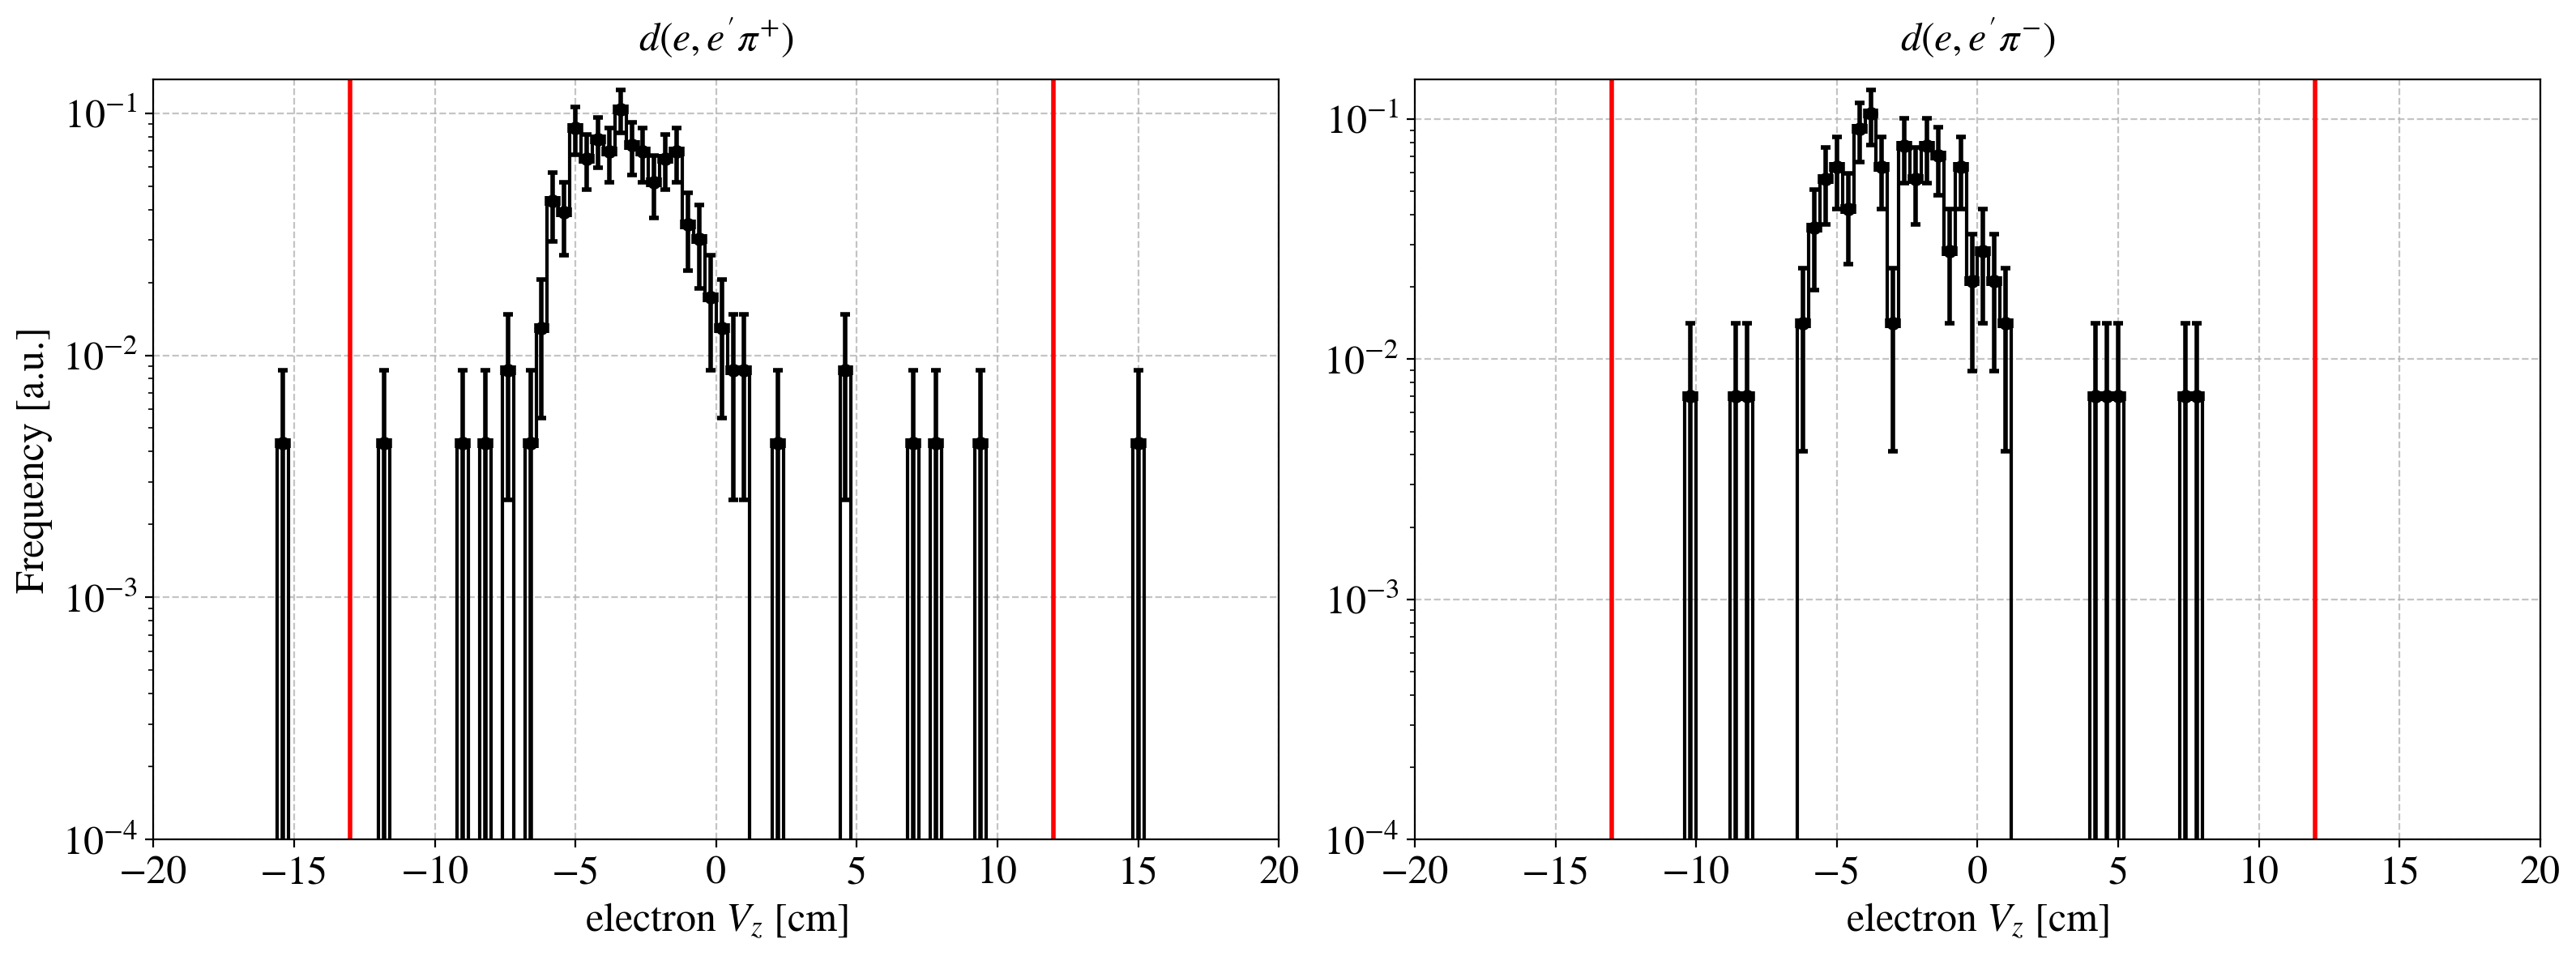

In [397]:
# electron vertex z-position
xmin,xmax,Nbins = -20,20,101

fig = plt.figure(figsize=(16,6),tight_layout=True)
for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    ax = fig.add_subplot(1,2,pi_idx)
    x = Events_previous_cuts[pi_ch].Ve_z
    x,h,x_err,h_err = plot_step_hist(x, bins=np.linspace(xmin,xmax,Nbins),density=True, color='k');
    ymax = 1.1*np.max(h + h_err)
    set_axes(ax,'electron $V_z$ [cm]','Frequency [a.u.]' if pi_idx==1 else '',title="$d(e,e'"+pi_label+")$",fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,ymax),do_add_grid=True)
    ax.set_yscale('log')
    plt.plot([Ve_z_min,Ve_z_min],[1e-4,ymax],'-r',linewidth=2);
    plt.plot([Ve_z_max,Ve_z_max],[1e-4,ymax],'-r',linewidth=2);

save_figure(filename = figures_path + 'Ve_z' + '.pdf')

### 2.6 $|v_z(e) - v_z(\pi)| < 20.0$ cm 

In [398]:
previous_cut_label = '$-13.0< v^e_z < +12.0$' 
Events_previous_cuts = dict()

cut_idx = 6
dVe_z_max = float(cuts[cuts.parameter=='(Ve-Vpi)_z_max'].value)
cut_label = '$|v_z(e) - v_z(\pi)| < %.1f$ cm'%dVe_z_max

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    Events[pi_ch+' '+cut_label] = Events_previous_cuts[pi_ch][ np.abs(Events_previous_cuts[pi_ch].Vpi_z - Events_previous_cuts[pi_ch].Ve_z) < dVe_z_max ]
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2
4,$\frac{ECIN}{p} > 0.2 - \frac{PCAL}{p}$,231,142,51.8,4.2,49.1,5.0
5,$-13.0< v^e_z < +12.0$,229,142,51.3,4.2,49.1,5.0
6,$|v_z(e) - v_z(\pi)| < 20.0$ cm,211,138,47.3,4.0,47.8,4.9


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/Vpi_z_diff_Ve_z.pdf


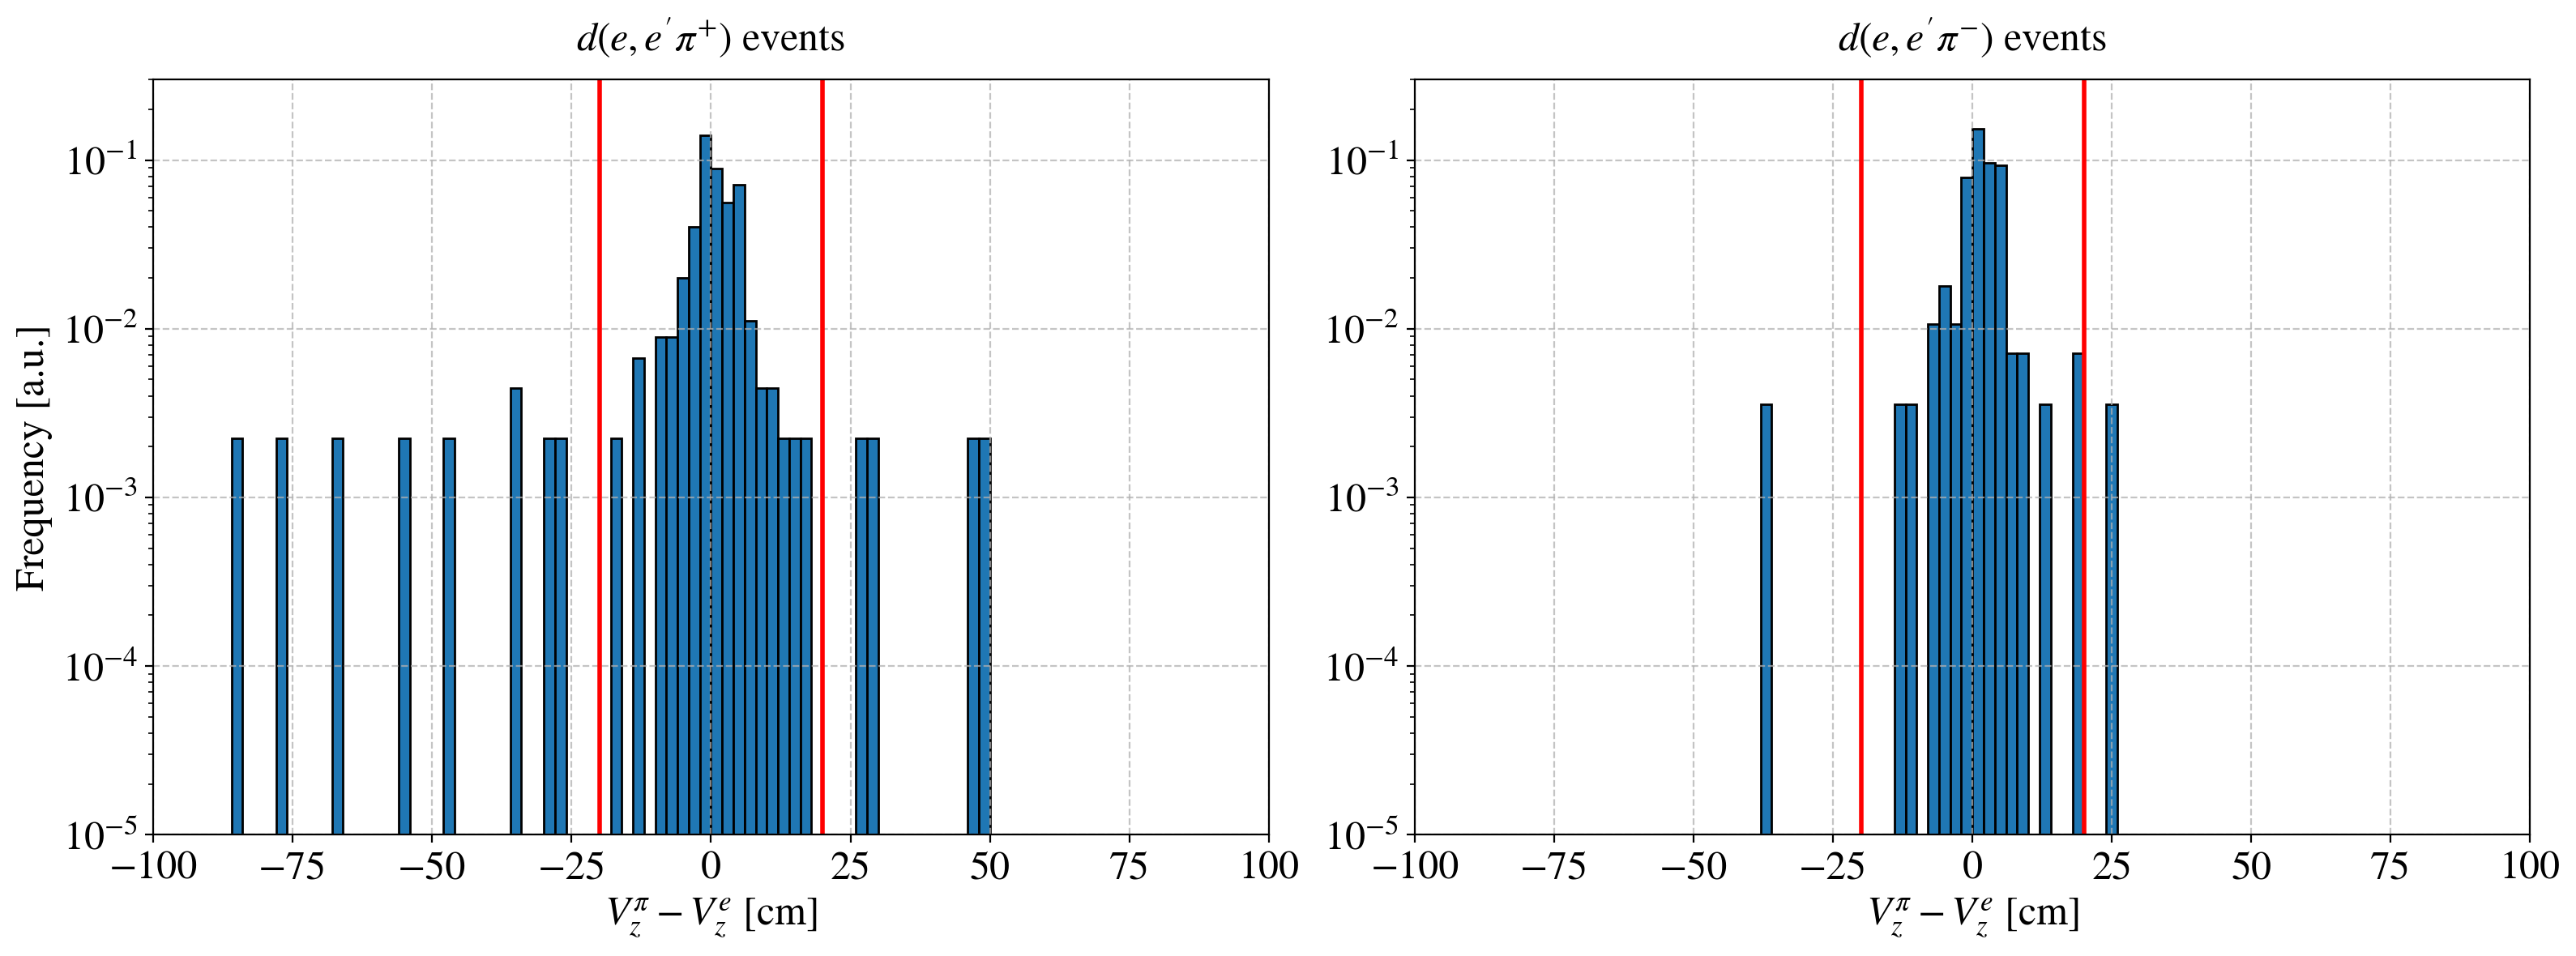

In [399]:
# Difference between electron and pion vertex z-position
fig = plt.figure(figsize=(16,6),tight_layout=True)
xmin,xmax,Nbins = -100,100,101


for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = np.array(Events_previous_cuts[pi_ch].Vpi_z - Events_previous_cuts[pi_ch].Ve_z)
    # x = x[np.abs(x)>0]

    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$V^\pi_z - V^e_z$ [cm]',
             'Frequency [a.u.]' if pi_idx==1 else '',
             remove_ticks_y=False if pi_idx==1 else True,
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-5,3e-1),do_add_grid=True)
    ax.set_yscale('log')
    plt.plot([dVe_z_max,dVe_z_max],[1e-5,1],'-r',linewidth=2);
    plt.plot([-dVe_z_max,-dVe_z_max],[1e-5,1],'-r',linewidth=2);

save_figure(filename = figures_path + 'Vpi_z_diff_Ve_z' + '.pdf')

### 2.7 Cut on $\chi^2_{PID}$

In [400]:
def chi2min(p_arr, pi_ch='piplus'):
    if (pi_ch=="piplus"):     C = 0.88;
    elif (pi_ch=="piminus") : C = 0.93;        
    chi2min_arr = []
    for p in p_arr: chi2min_arr.append(-C*3);
    return np.array(chi2min_arr)
    
def chi2max(p_arr, pi_ch='piplus'):
    if (pi_ch=="piplus"):    C = 0.88;
    elif (pi_ch=="piminus"): C = 0.93;
    
    chi2max_arr = []
    for p in p_arr:
        if (p<2.44):         chi2max_arr.append(C*3);
        elif (p<4.6):        chi2max_arr.append(C*( 0.00869 + 14.98587*np.exp(-p/1.18236)+1.81751*np.exp(-p/4.86394) )   );
        else:                chi2max_arr.append(C*( -1.14099 + 24.14992*np.exp(-p/1.36554) + 2.66876*np.exp(-p/6.80552)) );
    return np.array(chi2max_arr)


In [402]:
previous_cut_label = '$|v_z(e) - v_z(\pi)| < %.1f$ cm'%dVe_z_max
Events_previous_cuts = dict()

cut_idx = 7
dVe_z_max = float(cuts[cuts.parameter=='(Ve-Vpi)_z_max'].value)
cut_label = 'Cut on $\chi^2_{PID}$'

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    df = Events_previous_cuts[pi_ch]
    df_after_cut = df[ (chi2min(df.pi_P,pi_ch) <= df.pi_chi2PID)                                 
                      & (df.pi_chi2PID <= chi2max(df.pi_P,pi_ch)) ]

    Events[pi_ch+' '+cut_label] = df_after_cut
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2
4,$\frac{ECIN}{p} > 0.2 - \frac{PCAL}{p}$,231,142,51.8,4.2,49.1,5.0
5,$-13.0< v^e_z < +12.0$,229,142,51.3,4.2,49.1,5.0
6,$|v_z(e) - v_z(\pi)| < 20.0$ cm,211,138,47.3,4.0,47.8,4.9
6,Cut on $\chi^2_{PID}$,210,137,47.1,3.9,47.4,4.9
7,Cut on $\chi^2_{PID}$,135,55,30.3,3.0,19.0,2.8


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/pi_chi2PID_vs_pi_P.pdf


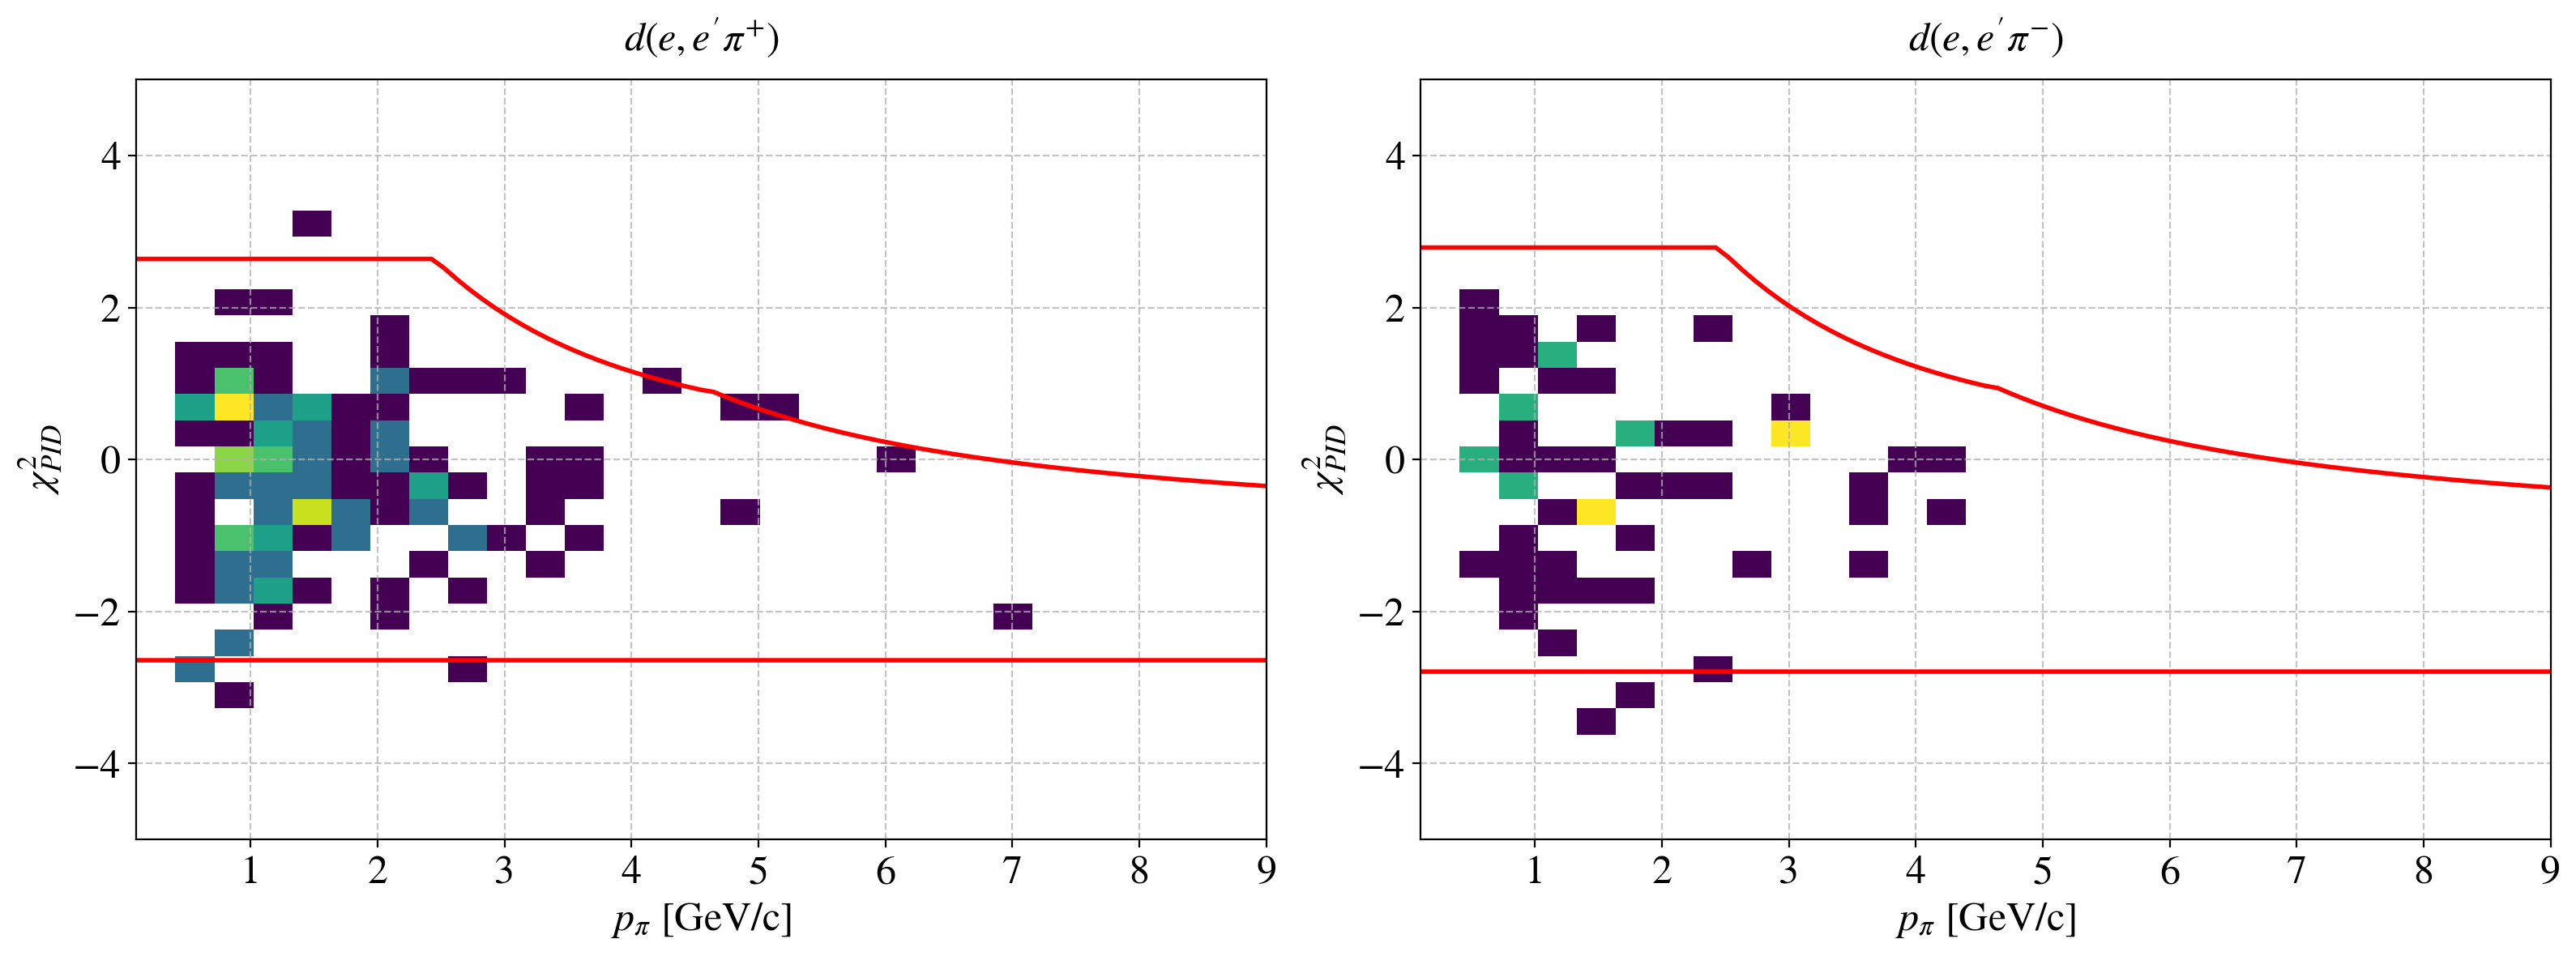

In [403]:
# chi2PID vs p
xmin,xmax,ymin,ymax,Nbins = 0.1,9,-5,5,30
fig = plt.figure(figsize=(16,6),tight_layout=True)

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):

    ax = fig.add_subplot(1,2,pi_idx)
    
    x = np.array(Events_previous_cuts[pi_ch].pi_P)
    y = np.array(Events_previous_cuts[pi_ch].pi_chi2PID)
    plt.hist2d( x, y, bins=(np.linspace(xmin,xmax,Nbins),np.linspace(ymin,ymax,Nbins)),  norm=LogNorm() );    
    set_axes(ax,'$p_\pi$ [GeV/c]','$\chi^2_{PID}$',title="$d(e,e'"+pi_label+")$",ylim=(ymin,ymax),fontsize=18, do_add_grid=True)
    
    # The event-selection limit
    p_e_fit = np.linspace(0,10,100)
    plt.plot(p_e_fit, chi2min(p_e_fit,pi_ch),'-r', linewidth=2)
    plt.plot(p_e_fit, chi2max(p_e_fit,pi_ch),'-r', linewidth=2)    

    # cbar=plt.colorbar()
    # cbar.ax.tick_params(axis="both", labelsize=21)
save_figure(filename = figures_path + 'pi_chi2PID_vs_pi_P' + '.pdf')
print('Note: here we do not show some 50% of the pions for which the chi2 is very poor ')

### 2.7 Cut on $\chi^2_{PID}$

In [400]:
def chi2min(p_arr, pi_ch='piplus'):
    if (pi_ch=="piplus"):     C = 0.88;
    elif (pi_ch=="piminus") : C = 0.93;        
    chi2min_arr = []
    for p in p_arr: chi2min_arr.append(-C*3);
    return np.array(chi2min_arr)
    
def chi2max(p_arr, pi_ch='piplus'):
    if (pi_ch=="piplus"):    C = 0.88;
    elif (pi_ch=="piminus"): C = 0.93;
    
    chi2max_arr = []
    for p in p_arr:
        if (p<2.44):         chi2max_arr.append(C*3);
        elif (p<4.6):        chi2max_arr.append(C*( 0.00869 + 14.98587*np.exp(-p/1.18236)+1.81751*np.exp(-p/4.86394) )   );
        else:                chi2max_arr.append(C*( -1.14099 + 24.14992*np.exp(-p/1.36554) + 2.66876*np.exp(-p/6.80552)) );
    return np.array(chi2max_arr)


In [402]:
previous_cut_label = '$|v_z(e) - v_z(\pi)| < %.1f$ cm'%dVe_z_max
Events_previous_cuts = dict()

cut_idx = 7
dVe_z_max = float(cuts[cuts.parameter=='(Ve-Vpi)_z_max'].value)
cut_label = 'Cut on $\chi^2_{PID}$'

for pi_ch in pi_charge_names:
    Events_previous_cuts[pi_ch] = Events[pi_ch+' '+previous_cut_label]
    df = Events_previous_cuts[pi_ch]
    df_after_cut = df[ (chi2min(df.pi_P,pi_ch) <= df.pi_chi2PID)                                 
                      & (df.pi_chi2PID <= chi2max(df.pi_P,pi_ch)) ]

    Events[pi_ch+' '+cut_label] = df_after_cut
    
Npips,Npims,fpips,dfpips,fpims,dfpims  = compute_cut_impact_on_statistics(Events['piplus '+cut_label],Events['piminus '+cut_label], Npips_noCuts, Npims_noCuts)
Nevents = pd.concat([Nevents,pd.DataFrame({cols[0]:cut_label,
                                               cols[1]:Npips,cols[2]:Npims,cols[3]:fpips,cols[4]:dfpips,cols[5]:fpims,cols[6]:dfpims},                                              
                                              index=[cut_idx])])
Nevents

,Cut,$N_{\pi^+}$,$N_{\pi^-}$,$f_{\pi^+}$ [%],$\Delta f_{\pi^+}$ [%],$f_{\pi^-}$ [%],$\Delta f_{\pi^-}$ [%]
0,No cut,446,289,100.0,6.7,100.0,8.3
1,PCAL 19<V & 19<W,243,150,54.5,4.3,51.9,5.2
2,70 MeV < PCAL Edep,242,150,54.3,4.3,51.9,5.2
3,$(PCAL + ECIN + ECOUT)/p_e > 0.17$,238,150,53.4,4.3,51.9,5.2
4,$\frac{ECIN}{p} > 0.2 - \frac{PCAL}{p}$,231,142,51.8,4.2,49.1,5.0
5,$-13.0< v^e_z < +12.0$,229,142,51.3,4.2,49.1,5.0
6,$|v_z(e) - v_z(\pi)| < 20.0$ cm,211,138,47.3,4.0,47.8,4.9
6,Cut on $\chi^2_{PID}$,210,137,47.1,3.9,47.4,4.9
7,Cut on $\chi^2_{PID}$,135,55,30.3,3.0,19.0,2.8


## (1.2) Add electron momentum and Vertex $z$-position

# (2) Kinematical cuts

## (2.1) $Q^2, W, y, p_e, p_\pi, \theta_e, \theta_p$

In [ ]:
# W
pi_ch = 'piplus'
xmin,xmax,Nbins = 0.0,4.7,101
x = np.array(W[pi_ch])
Wmin = float(cuts[cuts.parameter=='W_min'].value)

fig = plt.figure(figsize=(9,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
set_axes(ax,'$W$ [GeV/c$^2$]','Frequency [a.u.]',fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,3e-0),do_add_grid=True)
ax.set_yscale('log')
plt.plot([Wmin,Wmin],[1e-7,3],'-r',linewidth=2);
save_figure(filename = figures_path + 'W_no_cuts' + '.pdf')

In [ ]:
pi_ch = 'piplus'
xmin,xmax,Nbins = 0.75,9.7,101
x = np.array(Q2[pi_ch])
Q2_min = float(cuts[cuts.parameter=='Q2_min'].value)

fig = plt.figure(figsize=(9,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','Frequency [a.u.]',fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,3e-0),do_add_grid=True)
ax.set_yscale('log')

plt.plot([Q2_min,Q2_min],[1e-7,1],'-r',linewidth=2);


save_figure(filename = figures_path + 'Q2_no_cuts' + '.pdf')

In [ ]:
pi_ch = 'piplus'
xmin,xmax,Nbins = 0.,1.,101
x = np.array(y[pi_ch])
y_max = float(cuts[cuts.parameter=='y_max'].value)

fig = plt.figure(figsize=(9,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
set_axes(ax,'$y$','Frequency [a.u.]',fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,3e-0),do_add_grid=True)
ax.set_yscale('log')

plt.plot([y_max,y_max],[1e-7,1.4e-0],'-r',linewidth=2);


save_figure(filename = figures_path + 'y_no_cuts' + '.pdf')

In [ ]:
pi_ch = 'piplus'
xmin,xmax,Nbins = 5,40.,121
x = np.array(e_Theta[pi_ch])*180./np.pi
e_theta_min = float(cuts[cuts.parameter=='e_theta_min'].value)
e_theta_max = float(cuts[cuts.parameter=='e_theta_max'].value)


fig = plt.figure(figsize=(9,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
set_axes(ax,'$\\theta_e$ [deg.]','Frequency [a.u.]',fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,2e-1),do_add_grid=True)
ax.set_yscale('log')
plt.plot([e_theta_min+0.1,e_theta_min+0.1],[1e-7,1e-1],'-r',linewidth=2);
plt.plot([e_theta_max,e_theta_max],[1e-7,1e-1],'-r',linewidth=2);
save_figure(filename = figures_path + 'e_Theta_no_cuts' + '.pdf')

In [ ]:
pi_ch = 'piplus'
xmin,xmax,Nbins = 0.,11.,101
x = np.array(e_P[pi_ch])
e_P_min = float(cuts[cuts.parameter=='Pe_min'].value)
# e_P_max = float(cuts[cuts.parameter=='Pe_max'].value)
fig = plt.figure(figsize=(9,6),tight_layout=True)
ax = fig.add_subplot(1,1,1)
plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
set_axes(ax,'$p_e$ [GeV/c]','Frequency [a.u.]',fontsize=18, xlim=(xmin,xmax),ylim=(1e-4,3e-1),do_add_grid=True)
ax.set_yscale('log')
plt.plot([e_P_min,e_P_min],[1e-7,3e-1],'-r',linewidth=2);
# plt.plot([e_P_max,e_P_max],[1e-7,1e-1],'-r',linewidth=2);
save_figure(filename = figures_path + 'e_P_no_cuts' + '.pdf')

In [ ]:
# pi_P
fig = plt.figure(figsize=(16,6),tight_layout=True)
xmin,xmax,Nbins = 0,11,101
pi_P_min = float(cuts[cuts.parameter=='Ppi_min'].value)
pi_P_max = float(cuts[cuts.parameter=='Ppi_max'].value)

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = np.array(pi_P[pi_ch])
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$p_\pi$ [GeV/c]',
             'Frequency [a.u.]' if pi_idx==1 else '',
             remove_ticks_y=False if pi_idx==1 else True,
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-5,1.2e0),do_add_grid=True)
    ax.set_yscale('log')
    plt.plot([pi_P_min,pi_P_min],[1e-5,1],'-r',linewidth=2);
    plt.plot([pi_P_max,pi_P_max],[1e-5,1],'-r',linewidth=2);

save_figure(filename = figures_path + 'pi_P_no_cuts' + '.pdf')

In [ ]:
# theta_P
fig = plt.figure(figsize=(16,6),tight_layout=True)
xmin,xmax,Nbins = 0,150,101
pi_theta_min = float(cuts[cuts.parameter=='pi_theta_min'].value)
pi_theta_max = float(cuts[cuts.parameter=='pi_theta_max'].value)

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = np.array(pi_Theta[pi_ch])*180./np.pi
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$\\theta_\pi$ [deg.]',
             'Frequency [a.u.]' if pi_idx==1 else '',
             remove_ticks_y=False if pi_idx==1 else True,
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-5,4e-2),do_add_grid=True)
    ax.set_yscale('log')
    plt.plot([pi_theta_min,pi_theta_min],[1e-5,1],'-r',linewidth=2);
    plt.plot([pi_theta_max,pi_theta_max],[1e-5,1],'-r',linewidth=2);

save_figure(filename = figures_path + 'pi_Theta_no_cuts' + '.pdf')

In [ ]:
## M_x
Nevntries = NeventsMax
M_x = dict()
pi     = ROOT.TLorentzVector()
p_rest = ROOT.TLorentzVector()
q      = ROOT.TLorentzVector()
p_rest.SetXYZM(0, 0, 0, 0.938272);

for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    
    filename = '~/Desktop/data/BAND/inclusive_no_cuts/skimmed_SIDIS_sidisdvcs_006421_e_%s.root'%pi_ch
    f = ROOT.TFile(filename)
    tree = f.Get("tree")
    
    M_x[pi_ch] = []
    
    for entryNum in range(0,np.min([Nevntries,tree.GetEntries()])):
        tree.GetEntry(entryNum)
        q = getattr(tree,"q") 
        Npi = getattr(tree,"Npi")
        if Npi>0:
            pi = getattr(tree,"pi") 
            M_x[pi_ch].append( ( q + p_rest - pi[0] ).Mag() );
    f.Close()
print('done')

In [ ]:
# M_x
fig = plt.figure(figsize=(16,6),tight_layout=True)
xmin,xmax,Nbins = 0,4,101
M_x_min = 1.7

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = np.array(M_x[pi_ch])
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$M_x$ [GeV/c$^2$]',
             'Frequency [a.u.]' if pi_idx==1 else '',
             remove_ticks_y=False if pi_idx==1 else True,
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-5,0.6),do_add_grid=True)
    # ax.set_yscale('log')
    plt.plot([M_x_min,M_x_min],[1e-5,0.6],'-r',linewidth=2);

save_figure(filename = figures_path + 'M_x_no_cuts' + '.pdf')

## add $z$ of the pion

In [ ]:
# z
fig = plt.figure(figsize=(16,6),tight_layout=True)
xmin,xmax,Nbins = 0,1.1,101
z_min = 0.3

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    x = np.array(Zpi[pi_ch])
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$z$',
             'Frequency [a.u.]' if pi_idx==1 else '',
             remove_ticks_y=False if pi_idx==1 else True,
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18, xlim=(xmin,xmax),ylim=(1e-5,5.5),
             do_add_grid=True)
    # ax.set_yscale('log')
    plt.plot([z_min,z_min],[1e-5,6],'-r',linewidth=2);
save_figure(filename = figures_path + 'z_no_cuts' + '.pdf')

# (3) Reproduce Alex' acceptance matching cut

In [ ]:
# theta_Pi vs. p_Pi
fig = plt.figure(figsize=(16,6),tight_layout=True)
bins = (np.linspace(1.2,5,100),np.linspace(0,40,100))
sector = 1

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    p = np.array(pi_P[pi_ch])
    theta = np.array(pi_Theta[pi_ch])*180./np.pi
    pi_sector = np.array(pi_Sector[pi_ch])
    
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist2d( p[pi_sector==sector], theta[pi_sector==sector], bins , cmap='hot_r')

    
    
    # plt.hist( x, bins=np.linspace(xmin,xmax,Nbins),density=True,edgecolor='k');
    set_axes(ax,'$p_\pi$ [GeV/c]','$\\theta_\pi$ [deg.]',
             title="$d(e,e'"+pi_label+")$ events",
             fontsize=18,do_add_grid=True)

In [ ]:
fig = plt.figure(figsize=(16,32),tight_layout=True)
delta_p   = 0.5
p_min_arr = np.arange(1.25,5,delta_p)
p_max_arr = p_min_arr + delta_p

theta_bins = np.linspace(4,36,41)
sector = 1
Np = 7

for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
    p = np.array(pi_P[pi_ch])
    theta = np.array(pi_Theta[pi_ch])*180./np.pi
    pi_sector = np.array(pi_Sector[pi_ch])


    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
        theta_in_bin = theta[ (pi_sector==sector) & (p_min < p) & (p < p_max) ]
        ax = fig.add_subplot( Np, 2, 2*p_idx + pi_idx )
        h,edges = np.histogram( theta_in_bin, theta_bins )
        # h,edges,_ = ax.hist(theta_in_bin, theta_bins, histtype='step')
        x = (edges[1:]+edges[:-1])/2
        plt.plot(x, h)
        set_axes(ax,'$\\theta_{%s}$ [deg.]'%pi_label,'',
                 title="sector %d, $%.2f < p_{%s} < %.2f$ GeV/c"%(sector,p_min,pi_label,p_max))
        
        # find the theta value for X% of the distribution
        theta_prctl = np.percentile( theta_in_bin, 1 )
        plt.plot([theta_prctl,theta_prctl],[0,np.max(h)],'-r')
        if p_idx>=Np: break

